# <font color = 'BROWN' size = 6> BHARAT DATA SCIENCE INTERN </font>
# <font color = 'CYAN' size = 5> TASK - 1 : TITANIC DATA </font>
# <font color = 'b' size = 3> NAME : KAVIARASU KARMEGAM </font>
# <font color = 'green' size = 4> Description </font>

I have a Titanic dataset. It containing a passenger details, Including passenger name,age,sex,parch,emparked,ticket price fare  and suriviving passenger details.


# <font color = 'green' size = 4> Objective </font>

My goal is to predict how many members survived from exixting dataset. Such as cleaning the data Cheak  Whether the Null values present or not in the dataset. Cheak duplicate values, Find out the Outleirs and Romove the Outleirs in the Dataset, split the dataset into train and split and build the regression model and cheack R value and mean squared error value to consider as which regression model is accurate.

<img src = "titanic.jpg" style = "width:400;height:200"/>


# <font size = 5 color = 'green'> Basic libraries</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# <font size = 3 color = 'brown'> Read Data_set </font>

In [3]:
tit = pd.read_csv('Titanic+Data+Set.csv')

In [4]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# <font size = 5 color = 'green'> Understanding the data structure </font>

# <font size = 3 color = 'brown'> First Five Rows: </font>

In [5]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <font size = 3 color = 'brown'> Last Five Rows </font>

In [6]:
tit.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# <font size = 3 color = 'brown'> Understanding The Data_Patterns </font> 

In [8]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
tit.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# <font size = 5 color = 'green'> Data Cleaning </font>

# <font size = 3 color = 'brown'> Cheak, Impute or Drop Null_values </font> 

In [10]:
tit.isnull().sum()* 100/len(tit) 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
tit.drop('Cabin',axis = 1,inplace = True)

In [12]:
tit['Age'] = tit['Age'].fillna(tit['Age'].median())

In [13]:
tit['Embarked'] = tit['Embarked'].fillna(tit['Embarked'].mode()[0])

In [14]:
tit.drop('Ticket',inplace = True,axis = 1)

In [15]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# <font size = 3 color = 'brown'> Cheack Duplicates </font>

In [16]:
tit.duplicated().sum()

0

In [17]:
def split_title(name):
    if 'Mrs' in name:
        return 'Mrs'
    elif 'Mr' in name:
        return 'Mr'
    elif 'Miss' in name:
        return 'Miss'
    elif 'Master' in name:
        return 'Master'
    elif 'Rev' in name:
        return 'Rev'
    elif 'Dr' in name:
        return 'Doctor'
    elif 'Capt' in name:
        return 'Caption'
    else:
        return 'Others'

tit['Title'] = tit['Name'].apply(split_title)

In [18]:
tit['Title'].value_counts()

Mr         518
Miss       180
Mrs        129
Master      40
Others      10
Doctor       7
Rev          6
Caption      1
Name: Title, dtype: int64

In [19]:
tit.drop('Name',axis = 1,inplace = True)

In [20]:
tit.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


# <font color = 'green' size = 5 > Univariate Analysis </font>

# <font size = 3 color = 'brown'> Histogram and Boxplot</font>

<Axes: title={'center': 'Boxplot of Fare'}, xlabel='Fare'>

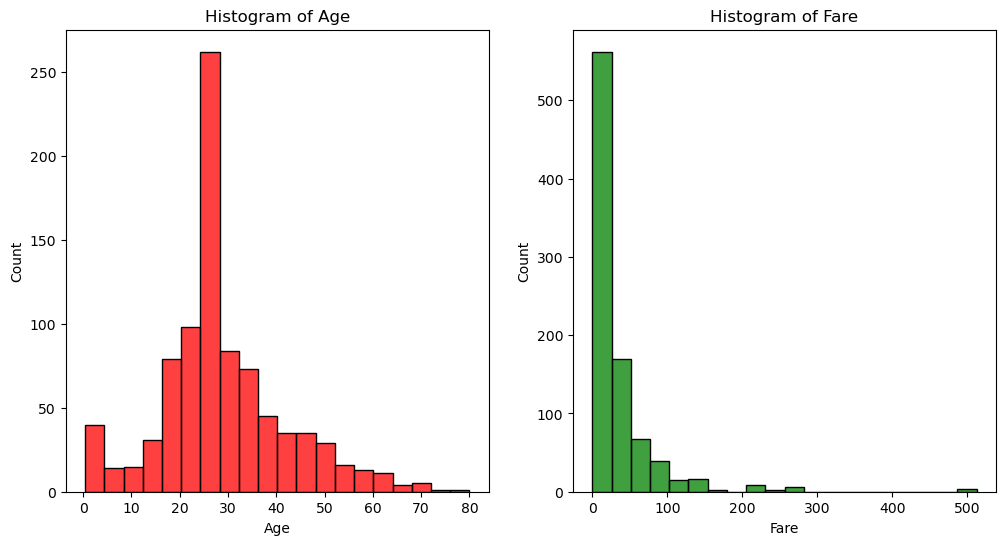

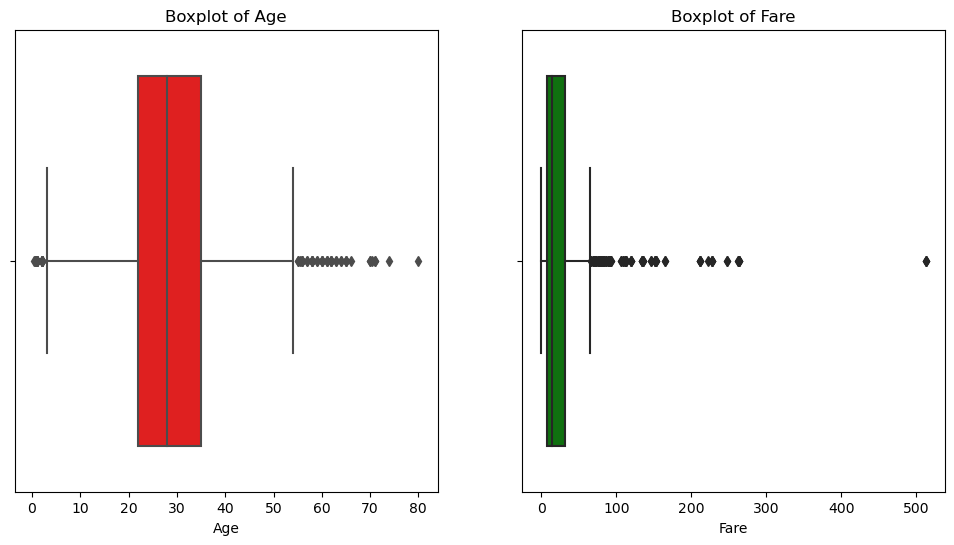

In [21]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Histogram of Age')
sns.histplot(data = tit, x = 'Age', bins = 20, color = "red")

plt.subplot(1,2,2)
plt.title('Histogram of Fare')
sns.histplot(data = tit, x = 'Fare', bins = 20, color = "green")


plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Boxplot of Age')
sns.boxplot(data = tit, x = 'Age', color = "red")

plt.subplot(1,2,2)
plt.title('Boxplot of Fare')
sns.boxplot(data = tit, x = 'Fare', color = "green" )


# <font size = 3 color = 'brown' > Cheack Outleirs </font>

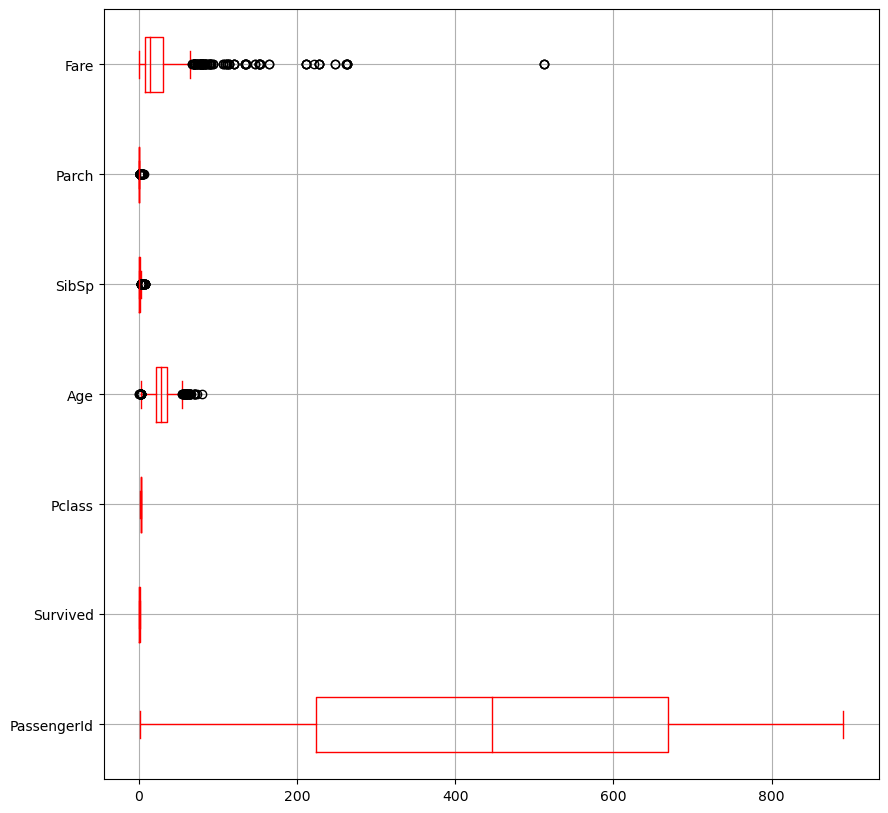

In [22]:
plt.figure(figsize = (10,10))
tit.boxplot(vert = 0,color = 'red')
plt.show()

# <font size = 3 color = 'brown' > Remove Outleirs </font>

In [23]:
tit['Age'] = np.log1p(tit['Age'])

In [24]:
tit['Fare'] = np.log1p(tit['Fare']) 

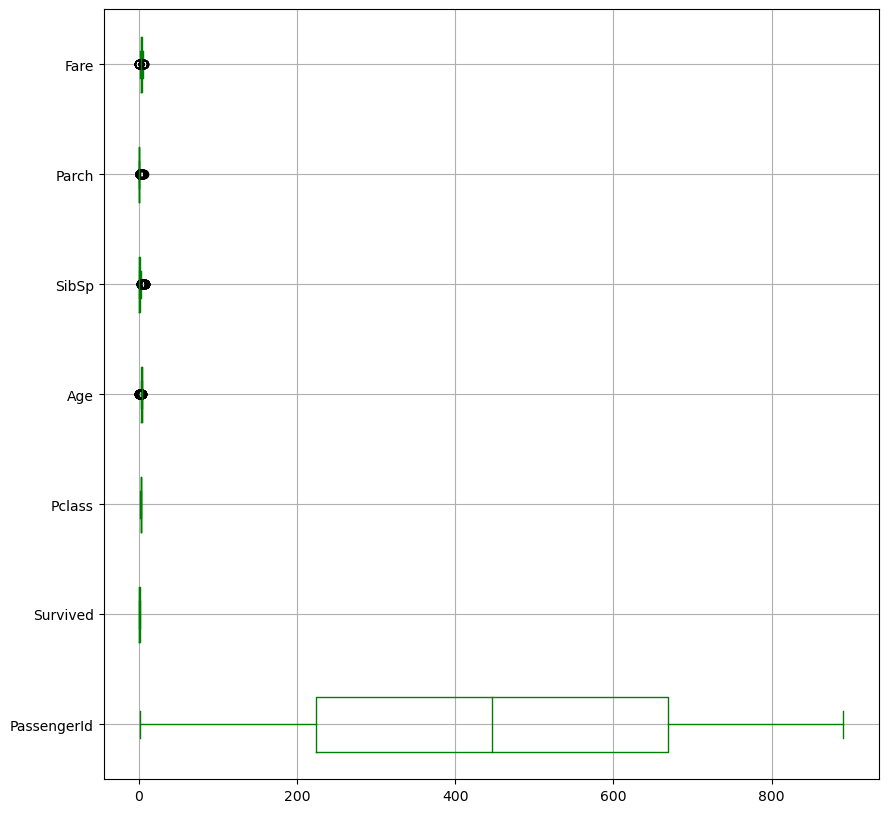

In [34]:
plt.figure(figsize = (10,10))
tit.boxplot(vert = 0,color = 'green')
plt.show()

# <font color = 'green' size = 5 > Multivariate Analysis </font>

In [26]:
sns.pairplot(tit, hue = 'Title')
plt.show

C:\Users\DELL\AppData\Local\Temp\ipykernel_10644\715090049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = tit.corr()


<Axes: >

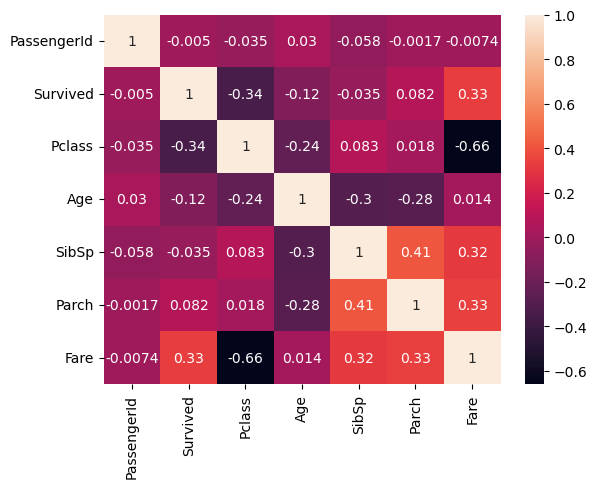

In [27]:
cor_matrix = tit.corr()
sns.heatmap(cor_matrix,annot = True)

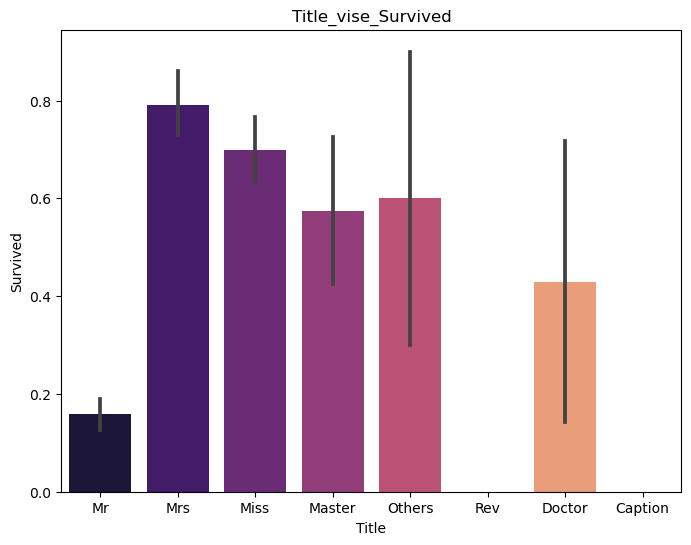

In [28]:
plt.figure(figsize = (8,6))
plt.title('Title_vise_Survived')
sns.barplot(data =  tit, x = 'Title', y = 'Survived', palette='magma')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

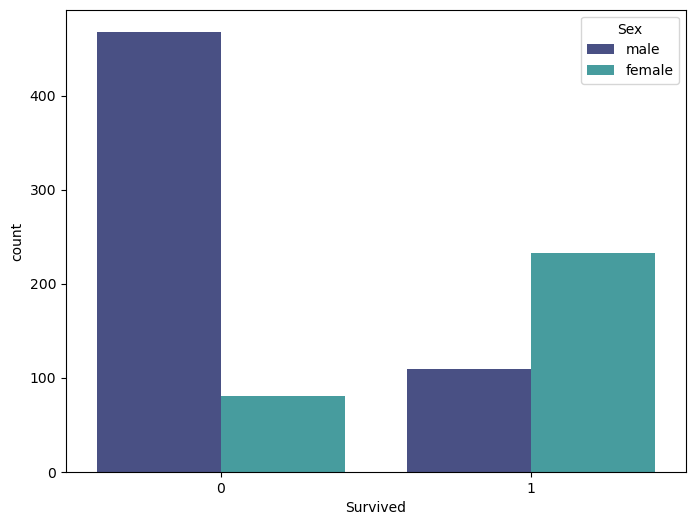

In [29]:
plt.figure(figsize = (8,6))
sns.countplot(data = tit, x = 'Survived', hue = 'Sex', palette='mako')
plt.show

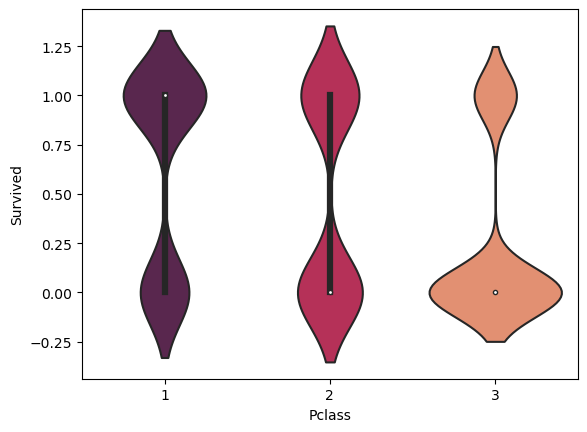

In [30]:
sns.violinplot(data = tit, x = 'Pclass', y = 'Survived', palette = 'rocket')
plt.show()

<Axes: xlabel='Age', ylabel='Survived'>

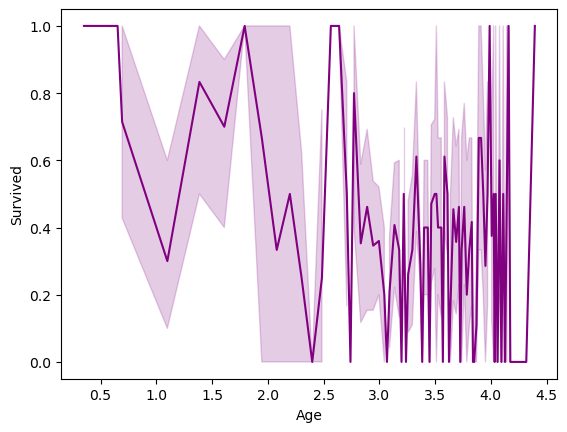

In [31]:
sns.lineplot(data = tit, x = 'Age', y = 'Survived', color = 'purple')

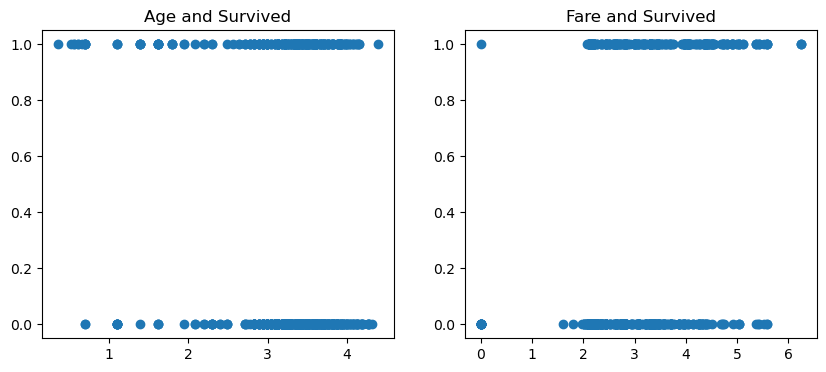

In [32]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title('Age and Survived')
plt.scatter(data = tit, x = 'Age', y = 'Survived')

plt.subplot(1,2,2)
plt.title('Fare and Survived')
plt.scatter(data = tit, x = 'Fare', y = 'Survived')

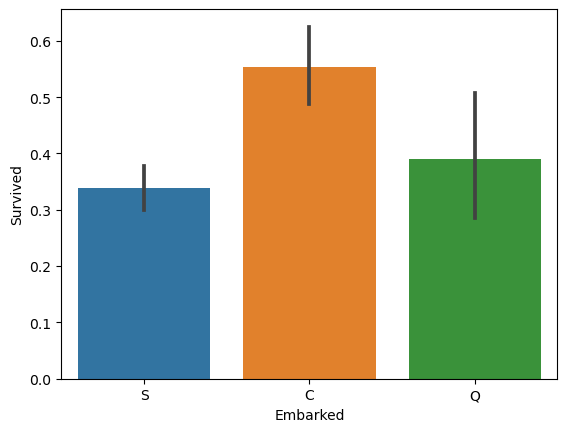

In [33]:
sns.barplot(data = tit, x = "Embarked", y = 'Survived')
plt.show()

# <font size = 3 color = 'brown' > LabelEncoading </font>

In [35]:
tit = pd.get_dummies(tit, columns = ['Title','Sex','Embarked'],drop_first = True)

In [36]:
tit.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title_Doctor,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Title_Rev,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,3.135494,1,0,2.110213,0,0,0,1,0,0,0,1,0,1
1,2,1,1,3.663562,1,0,4.280593,0,0,0,0,1,0,0,0,0,0
2,3,1,3,3.295837,0,0,2.188856,0,0,1,0,0,0,0,0,0,1
3,4,1,1,3.583519,1,0,3.990834,0,0,0,0,1,0,0,0,0,1
4,5,0,3,3.583519,0,0,2.202765,0,0,0,1,0,0,0,1,0,1


# <font size = 5 color = 'green'> Model Building </font>

# <font size = 3 color = 'brown' > Split Train and Test Data

In [37]:
X = tit.drop('Survived',axis = 1)
y = tit[['Survived']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)


# <font size = 3 color = 'brown' > Normalization </font>

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
X_train

array([[-1.29438938,  0.80278702, -0.64513118, ..., -1.36783323,
        -0.30177525, -1.67295561],
       [ 1.70073081, -0.40527171,  0.12832905, ..., -1.36783323,
        -0.30177525, -1.67295561],
       [-1.44414539,  0.80278702,  0.12832905, ...,  0.73108328,
        -0.30177525,  0.59774449],
       ...,
       [-1.45990918, -0.40527171, -0.31968986, ...,  0.73108328,
        -0.30177525,  0.59774449],
       [-0.81753472,  0.80278702,  0.12832905, ..., -1.36783323,
        -0.30177525,  0.59774449],
       [-1.59784234,  0.80278702, -0.31968986, ...,  0.73108328,
        -0.30177525,  0.59774449]])


# <font size = 3 color = 'brown' > Machine Learning Algorithms Using for Prediction </font>

# <font size = 3 color = "blue"> LogisticRegression </font>

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [80]:
log_reg.score(X_test,y_test)

0.7947761194029851

In [81]:
log_reg.score(X_train,y_train)

0.8523274478330658

In [82]:
y_predict = log_reg.predict(X_test)

In [83]:
accuracy_score(y_test,y_predict)

0.7947761194029851

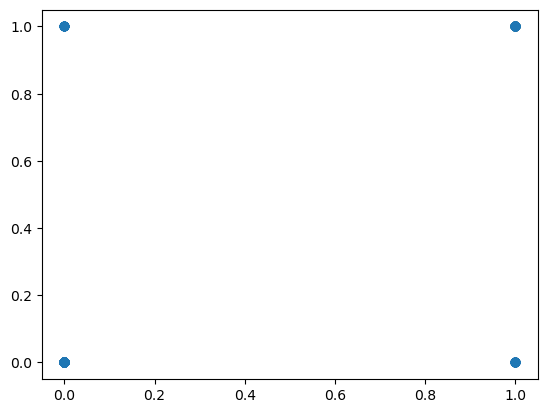

In [84]:
plt.scatter(y_test,y_predict)
plt.show()

In [85]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [86]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [87]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.453 
MSE = 0.20522388059701493 
MAE = 0.20522388059701493 
R2 = 0.1622620062517759 
Adjusted R2 = 0.10886038115228758


# <font size = 3 color = "blue" > RandomForestRegression </font>

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1544\1932820455.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [90]:
rf.score(X_train,y_train)

0.9224694477817825

In [91]:
rf.score(X_test,y_test)

0.24243962489343562

In [92]:
y_predict = rf.predict(X_test)

In [95]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [96]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.431 
MSE = 0.18558246268656714 
MAE = 0.3004850746268657 
R2 = 0.24243962489343562 
Adjusted R2 = 0.19414892369142345


# <font size = 3 color = "Blue" > Gradient Boosting Classifier </font>

In [164]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [166]:
gr.score(X_train,y_train)

0.9309791332263242

In [167]:
gr.score(X_test,y_test)

0.7910447761194029

In [168]:
y_predict = gr.predict(X_test)

In [169]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict))))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [184]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.518 
MSE = 0.26865671641791045 
MAE = 0.26865671641791045 
R2 = -0.09667519181585704 
Adjusted R2 = -0.1665827737642782


# <font size = 3 color = "Blue" > KNeighbors Classifier </font>

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [137]:
kn.score(X_train,y_train)

0.8812199036918138

In [138]:
kn.score(X_test,y_test)

0.7649253731343284

In [139]:
y_predict = kn.predict(X_test)

In [140]:
accuracy_score(y_test,y_predict)

0.7649253731343284

In [146]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict))))
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [185]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nadjusted_r2 = ', adj_r2)

RMSE =  0.518 
MSE =  0.26865671641791045 
MAE =  0.26865671641791045 
r2 =  -0.09667519181585704 
adjusted_r2 =  -0.1665827737642782


# <font size = 3 color = "Blue" > XG Boost Classifier </font>

In [187]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [188]:
from xgboost import XGBClassifier

In [189]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [190]:
xg.score(X_train,y_train)

1.0

In [191]:
xg.score(X_test,y_test)

0.7313432835820896

In [192]:
y_predict = xg.predict(X_test)

In [193]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [194]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nadjusted_r2 = ', adj_r2)

RMSE =  0.518 
MSE =  0.26865671641791045 
MAE =  0.26865671641791045 
r2 =  -0.09667519181585704 
adjusted_r2 =  -0.1665827737642782


<img src = tq.jpg style = width:20;height:50>